In [2]:
import tensorflow as tf
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

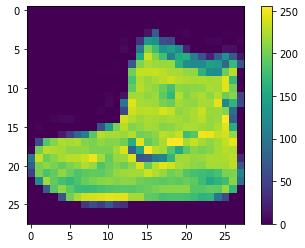

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
#Scale Values
train_images = train_images/255
test_images = test_images/255

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5)

model.evaluate(test_images, test_labels, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5329 - accuracy: 0.8118
Epoch 2/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4017 - accuracy: 0.8547
Epoch 3/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3655 - accuracy: 0.8673
Epoch 4/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3466 - accuracy: 0.8729
Epoch 5/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3311 - accuracy: 0.8781
10000/1 - 0s - loss: 0.2920 - accuracy: 0.8732


[0.3468404359102249, 0.8732]

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle Boot']

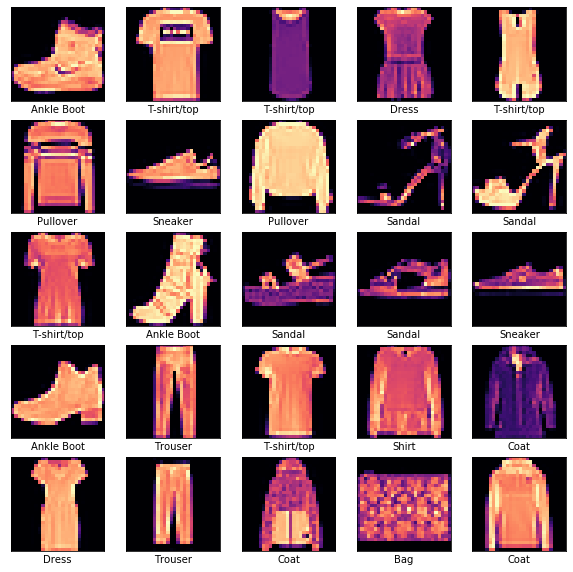

In [12]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap="magma")
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [15]:
model.fit(train_images, train_labels, epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4970 - accuracy: 0.8270
Epoch 2/12
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3737 - accuracy: 0.8657
Epoch 3/12
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3360 - accuracy: 0.8775
Epoch 4/12
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3135 - accuracy: 0.8850
Epoch 5/12
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2959 - accuracy: 0.8906
Epoch 6/12
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2825 - accuracy: 0.8938
Epoch 7/12
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2696 - accuracy: 0.9007
Epoch 8/12
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2563 - accuracy: 0.9043
Epoch 9/12
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2484 - accuracy: 0.9063
Epoch 10/12
60

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 0s - loss: 0.2275 - accuracy: 0.8870


In [17]:
predictions = model.predict(test_images)

def test_prediction(index):
    plt.figure()
    plt.imshow(test_images[index])
    plt.colorbar()
    plt.grid(False)
    plt.xlabel(class_names[train_labels[index]])
    plt.show()

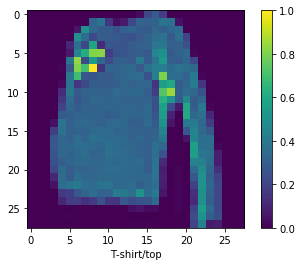

In [18]:
test_prediction(600)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
from tensorflow.keras import layers

In [22]:
a_model = tf.keras.Sequential()
# Add an Embedding layer expection input vocab of size 1000, and
# output embedding dimension of size 64.

a_model.add(layers.Embedding(input_dim=1000, output_dim=64))

#Add a LSTM layer with 128 internal units.
a_model.add(layers.LSTM(128))

#Add a Dense layer with 10 untis and softmax activation.
a_model.add(layers.Dense(10, activation='softmax'))

a_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [23]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None, ))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(encoder_input)

# Return states in addition to output
output, state_h, state_c = layers.LSTM(
    64, return_state=True, name='encoder')(encoder_embedded)
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None, ))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(decoder_input)

#Pass the 2 states to a new LSTM layer, as initial state
decoder_output = layers.LSTM(
    64, name="decoder")(decoder_embedded, initial_state=encoder_state)
output = layers.Dense(10, activation='softmax')(decoder_output)

model = tf.keras.Model([encoder_input, decoder_input], output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 64)     64000       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 64)     128000      input_2[0][0]                    
______________________________________________________________________________________________